In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [2]:
df = pd.read_csv('data/train.csv')
df = df.dropna()
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,record_id
3,4200.0,36 months,13.33,142.19,C,C3,Receptionist,< 1 year,MORTGAGE,21600.0,...,19.0,w,0.0,1.0,INDIVIDUAL,0.0,165.0,28187.0,14500.0,453447199
7,14000.0,36 months,15.31,487.45,C,C2,Department of the Army,10+ years,MORTGAGE,96000.0,...,29.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,276267.0,39700.0,453322484
12,20000.0,36 months,11.99,664.20,B,B3,"Sr. Specialist, Tax",10+ years,RENT,110000.0,...,35.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,41806.0,54600.0,453423047
16,8650.0,36 months,12.12,287.80,B,B3,Haven Hospice,8 years,RENT,76000.0,...,20.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,614403.0,10000.0,453286318
17,25000.0,60 months,17.27,624.95,C,C5,Cheney Public Schools,6 years,MORTGAGE,108000.0,...,40.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,337866.0,23800.0,453277374


In [3]:
df.replace('n/a', np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

data = df.drop(['emp_title', 'home_ownership', 'pymnt_plan','record_id', 'earliest_cr_line', 'grade', 'sub_grade', 'application_type', 'issue_d', 'zip_code', 'policy_code', 'verification_status', 'purpose', 'initial_list_status', 'addr_state'], axis=1)
data['term'] = pd.factorize(data['term'])[0]
data['loan_amnt'] = data['loan_amnt'].astype(float)

In [4]:
data.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,69010.000000,69010.000000,69010.000000,69010.000000,69010.000000,6.901000e+04,69010.000000,69010.000000,69010.000000,69010.000000,...,69010.000000,69010.000000,69010.000000,69010.000000,69010.000000,69010.000000,69010.000000,69010.000000,6.901000e+04,6.901000e+04
mean,14292.887987,0.249544,14.782499,443.981473,6.301927,7.807545e+04,0.759499,17.190718,0.605434,0.894769,...,11.732676,0.182727,14109.394870,54.866966,28.294088,0.014795,0.009144,259.912650,1.482840e+05,2.651965e+04
std,8189.266899,0.432752,4.311040,248.283839,3.493238,5.951871e+04,0.427391,7.846553,1.081644,1.090281,...,4.973530,0.516418,17293.240759,23.347583,11.516417,0.132956,0.104336,2328.447697,1.577138e+05,2.586940e+04
min,1000.000000,0.000000,5.320000,30.420000,1.000000,8.000000e+03,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02
25%,8000.000000,0.000000,11.990000,267.060000,3.000000,5.000000e+04,1.000000,11.330000,0.000000,0.000000,...,8.000000,0.000000,5687.000000,37.900000,20.000000,0.000000,0.000000,0.000000,3.198625e+04,1.210000e+04
50%,12000.000000,0.000000,14.330000,388.110000,7.000000,6.800000e+04,1.000000,16.680000,0.000000,1.000000,...,11.000000,0.000000,10189.000000,55.700000,27.000000,0.000000,0.000000,0.000000,9.570600e+04,2.010000e+04
75%,20000.000000,0.000000,17.570000,576.290000,10.000000,9.250000e+04,1.000000,22.660000,1.000000,1.000000,...,14.000000,0.000000,17544.000000,72.700000,35.000000,0.000000,0.000000,0.000000,2.221028e+05,3.300000e+04
max,35000.000000,1.000000,28.990000,1424.570000,10.000000,7.141778e+06,1.000000,39.990000,22.000000,6.000000,...,55.000000,12.000000,975800.000000,892.300000,111.000000,5.000000,5.000000,296368.000000,8.000078e+06,1.013700e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69010 entries, 3 to 200188
Data columns (total 21 columns):
loan_amnt                     69010 non-null float64
term                          69010 non-null int64
int_rate                      69010 non-null float64
installment                   69010 non-null float64
emp_length                    69010 non-null int32
annual_inc                    69010 non-null float64
loan_status                   69010 non-null int64
dti                           69010 non-null float64
delinq_2yrs                   69010 non-null float64
inq_last_6mths                69010 non-null float64
mths_since_last_delinq        69010 non-null float64
open_acc                      69010 non-null float64
pub_rec                       69010 non-null float64
revol_bal                     69010 non-null float64
revol_util                    69010 non-null float64
total_acc                     69010 non-null float64
collections_12_mths_ex_med    69010 non-null flo

In [31]:
array = data.values
Y = data['loan_status'].values

X = data.drop(['loan_status'], axis=1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
print(x_test)

[[-0.28368213 -0.57863309 -1.90272457 ... -0.13025348  0.59600237
   1.22735746]
 [ 0.44878711 -0.57863309 -0.62803526 ... -0.13025348 -0.20873724
   0.78597966]
 [ 0.69294352 -0.57863309 -1.61685675 ... -0.13025348  1.222561
   0.77874396]
 ...
 [ 1.22703568  1.72821089  1.48785526 ... -0.13025348 -0.53011516
  -0.39705756]
 [-0.28978604 -0.57863309 -0.26718572 ...  5.68472036  1.14718986
  -0.02441892]
 [ 0.49151448 -0.57863309  0.51309285 ... -0.0574686  -0.63084151
  -0.75160694]]


In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0, penalty = 'l1')
classifier1.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
y_pred = classifier.predict(x_test)

In [13]:
y_pred1 = classifier1.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm1 = confusion_matrix(y_test,y_pred1)

In [15]:
cm

array([[  297,  2974],
       [  286, 10245]], dtype=int64)

In [16]:
cm1

array([[  296,  2975],
       [  286, 10245]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

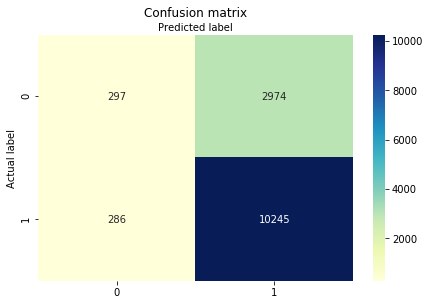

In [17]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7638023474858716
Precision: 0.7750208033890612
Recall: 0.972842085272054


In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

Accuracy: 0.7637298942182292
Precision: 0.7749621785173979
Recall: 0.972842085272054


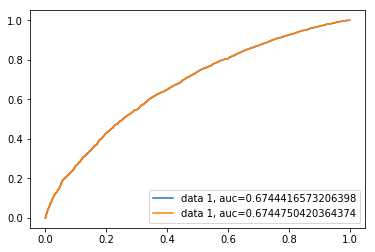

In [20]:
y_pred_proba = classifier.predict_proba(x_test)[::,1]
y_pred_proba1 = classifier1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(fpr1,tpr1,label="data 1, auc="+str(auc1))
plt.legend(loc=4)
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.09      0.15      3271
           1       0.78      0.97      0.86     10531

   micro avg       0.76      0.76      0.76     13802
   macro avg       0.64      0.53      0.51     13802
weighted avg       0.71      0.76      0.69     13802



In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.51      0.09      0.15      3271
           1       0.77      0.97      0.86     10531

   micro avg       0.76      0.76      0.76     13802
   macro avg       0.64      0.53      0.51     13802
weighted avg       0.71      0.76      0.69     13802



In [22]:
from sklearn import metrics
print (metrics.accuracy_score(y_test,classifier.predict(x_test)))

0.7638023474858716


In [23]:
data.corr()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1.000000,0.419079,0.207200,0.956240,0.071294,0.331844,-0.088639,0.014448,0.015918,-0.002139,...,0.164705,-0.084529,0.322258,0.113615,0.179799,-0.004409,0.014012,-0.015747,0.287614,0.329247
term,0.419079,1.000000,0.476435,0.179839,0.049017,0.064264,-0.163852,0.065962,0.003740,0.021812,...,0.062261,-0.017880,0.085757,0.048689,0.082595,0.009625,0.014615,-0.003611,0.102576,0.080900
int_rate,0.207200,0.476435,1.000000,0.185929,0.006216,-0.042272,-0.227392,0.138871,0.048905,0.244733,...,-0.008830,0.050516,-0.005866,0.213826,-0.034667,0.024280,0.034284,-0.001015,-0.076956,-0.134928
installment,0.956240,0.179839,0.185929,1.000000,0.062233,0.326908,-0.070348,0.012320,0.022244,0.022352,...,0.156608,-0.077405,0.314118,0.132536,0.162616,-0.004108,0.016051,-0.016099,0.260773,0.306071
emp_length,0.071294,0.049017,0.006216,0.062233,1.000000,0.041243,0.035117,0.014414,0.003636,-0.004986,...,-0.004202,0.011010,0.057955,0.041771,0.066794,-0.005156,0.008528,0.006034,0.077879,0.051889
annual_inc,0.331844,0.064264,-0.042272,0.326908,0.041243,1.000000,0.051448,-0.218072,0.047132,0.058471,...,0.102731,-0.017564,0.331312,0.043398,0.159722,0.000711,0.017155,0.007769,0.462450,0.307140
loan_status,-0.088639,-0.163852,-0.227392,-0.070348,0.035117,0.051448,1.000000,-0.136949,-0.041271,-0.040288,...,-0.027063,-0.005599,0.005325,-0.066880,0.025307,-0.014905,-0.017302,0.004174,0.059417,0.037817
dti,0.014448,0.065962,0.138871,0.012320,0.014414,-0.218072,-0.136949,1.000000,0.001057,-0.005441,...,0.269412,-0.054795,0.110326,0.156861,0.195443,-0.004855,0.010475,-0.025004,-0.045734,0.057436
delinq_2yrs,0.015918,0.003740,0.048905,0.022244,0.003636,0.047132,-0.041271,0.001057,1.000000,0.010379,...,0.053278,-0.044972,-0.008609,-0.019327,0.090099,0.040895,0.104517,-0.021791,0.063681,-0.005312
inq_last_6mths,-0.002139,0.021812,0.244733,0.022352,-0.004986,0.058471,-0.040288,-0.005441,0.010379,1.000000,...,0.117040,0.054304,-0.015696,-0.091848,0.141998,0.001743,-0.006955,0.010750,0.043393,0.016165


In [24]:
from sklearn.linear_model import Lasso, Ridge

In [25]:
lassoregressor = Lasso().fit(X, Y)
['{1} : {0}'.format(a, b) for a, b in zip(lassoregressor.coef_, data.columns)]

['loan_amnt : -1.106275013585415e-05',
 'term : -0.0',
 'int_rate : -0.0',
 'installment : 0.0001367892566279195',
 'emp_length : 0.0',
 'annual_inc : 4.2820600882713865e-07',
 'loan_status : -0.0',
 'dti : -0.0',
 'delinq_2yrs : -0.0',
 'inq_last_6mths : 0.0',
 'mths_since_last_delinq : -0.0',
 'open_acc : -0.0',
 'pub_rec : -2.4980161587346575e-06',
 'revol_bal : -0.0',
 'revol_util : 0.0',
 'total_acc : -0.0',
 'collections_12_mths_ex_med : -0.0',
 'acc_now_delinq : 9.716346854953094e-08',
 'tot_coll_amt : 1.849802069682357e-07',
 'tot_cur_bal : 2.047123280817316e-06']

In [26]:
ridgeregressor = Ridge().fit(X, Y)
['{1} : {0}'.format(a, b) for a, b in zip(ridgeregressor.coef_, data.columns)]

['loan_amnt : 1.5999643314563168e-06',
 'term : -0.09891925814497053',
 'int_rate : -0.013631638085107508',
 'installment : -0.00013925414303819222',
 'emp_length : 0.004408013146475541',
 'annual_inc : 9.420099133443446e-08',
 'loan_status : -0.0057746700391722375',
 'dti : -0.01282381540766983',
 'delinq_2yrs : -0.004423368809419614',
 'inq_last_6mths : 0.0002455723868396803',
 'mths_since_last_delinq : -0.004212279995268367',
 'open_acc : -0.007904681567281524',
 'pub_rec : -2.1635793480788066e-07',
 'revol_bal : -0.00025224142208904677',
 'revol_util : 0.0026233079093602426',
 'total_acc : -0.02827269714994951',
 'collections_12_mths_ex_med : -0.03167484652278957',
 'acc_now_delinq : -4.1003901385348475e-07',
 'tot_coll_amt : 1.279800182056761e-07',
 'tot_cur_bal : 4.810978721354185e-07']

In [27]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
for i, a in enumerate(alphas):
    lasso_reg = Lasso(alpha=a).fit(X, Y)
    ridge_reg = Ridge(alpha=a).fit(X, Y)
    coefs_lasso[i,:] = lasso_reg.coef_
    coefs_ridge[i,:] = ridge_reg.coef_

Text(0.5, 1.0, 'Ridge')

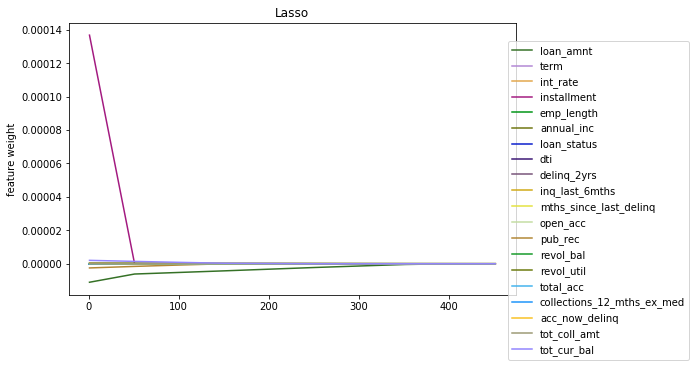

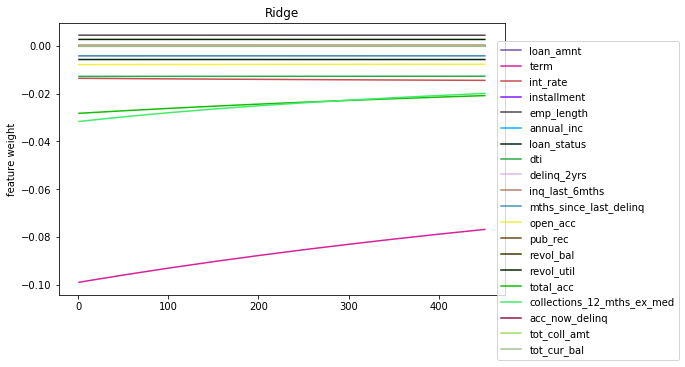

In [28]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
#plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
#plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")